In [1]:
from typing import List
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from toy_text_adventure import find_the_keys
from simplest_q_learner import q_learner

## test the game

In [3]:
game = find_the_keys()

In [4]:
game._get_state()

('look around',
 0,
 [('go left',
   0,
   [('climb tree', 0, []),
    ('search floor', 0, [('lift stone', 0, []), ('lift leaf', 0, [])])]),
  ('go straight',
   0,
   [('enter house',
     0,
     [('check cupboard', 1, []), ('check wardrobe', 0, [])])]),
  ('go right',
   0,
   [('check bike', 0, []),
    ('check mailbox',
     0,
     [('open first letter', 0, []),
      ('open second letter', 0, []),
      ('open third letter', 0, [])])])])

In [5]:
game.get_description()

'look around'

In [6]:
game.get_reward()

0

In [7]:
game.get_actions()

['go left', 'go straight', 'go right', 'go back']

In [8]:
game.do('go left')

'done'

In [9]:
game.get_actions()

['climb tree', 'search floor', 'go back']

In [10]:
game.do('go back')

'done'

In [11]:
game.get_actions()

['go left', 'go straight', 'go right', 'go back']

In [12]:
# how to solve
game.do('go straight')
game.do('enter house')
game.do('check cupboard')
print(game.reward)

1


# random exploration

In [13]:
game = find_the_keys()
steps = 900
rewards_random = []
rng = np.random.default_rng()
for i in range(steps):
    description = game.get_description()
    actions = game.get_actions()
    rewards_random.append(game.get_reward())
    #print(description, reward)
    if rewards_random[-1]:
        # this only makes sense because of the specific game here
        #print("You won! Reseting game.")
        game.reset()
    else:
        j = rng.integers(0, len(actions))
        #print("do", actions[j][0])
        game.do(actions[j])

In [14]:
sum(rewards_random)

9

## q-learning

In [15]:
# again the most naive way I could think of, see https://en.wikipedia.org/wiki/Q-learning
agent = q_learner()
game = find_the_keys()

state = game.get_description()
actions = game.get_actions()

steps = 900
rewards_q = []
verbose=False
agent.verbose=verbose

for i in range(steps):
    if verbose: print()
    if verbose: print("step", i, "state", state)
    
    action, action_q = agent.choose_action(state, actions)
    
    if verbose: print("do", action)
    game.do(action)
    
    new_state = game.get_description()
    new_reward = game.get_reward()
    new_actions = game.get_actions()
    
    if verbose: print("new reward", new_reward, "max new q", max_new_q)
    
    agent.learn(state, action, action_q, new_state, new_reward, new_actions)
    if verbose: print("q", agent.q)
    
    rewards_q.append(new_reward)
    
    # this particular game should be reset after the reward is found
    if new_reward:
        game.reset()
        new_state = game.get_description()
        new_actions = game.get_actions()
    
    # prepare for next iteration
    state = new_state
    actions = new_actions  

In [16]:
sum(rewards_q)

268

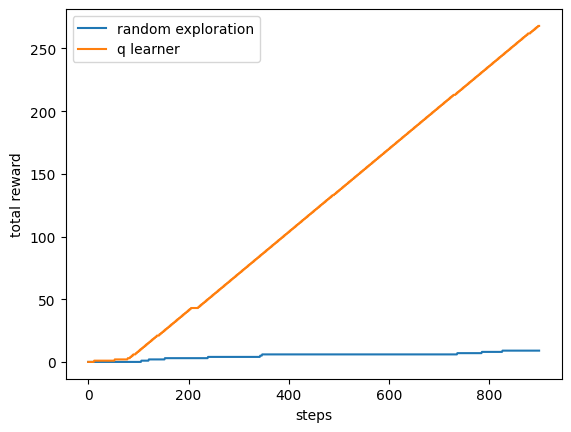

In [17]:
fig1 = plt.figure(num=1)
ax1 = fig1.gca()
ax1.plot(np.cumsum(rewards_random), label='random exploration')
ax1.plot(np.cumsum(rewards_q), label='q learner')
ax1.set_ylabel('total reward')
ax1.set_xlabel('steps')
ax1.legend()